### Import Libraries and Settings

In [3]:
# Import initial necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_columns = 100
pd.options.display.max_colwidth = None

# Version requirements
print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.26.4
pandas version :  2.2.1
seaborn version :  0.13.2


In [6]:
pd.set_option('display.max_colwidth', None)

#### Load Dataset (Jupyter Notebook)

In [4]:
df = pd.read_csv('hotel_bookings_data.csv')

#### Load Dataset (Google Colab)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# df = pd.read_csv('')

Mounted at /content/drive


In [37]:
# Retrieve 15 sample lines from the available data
df.sample(15)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
109870,City Hotel,0,13,2019,June,16,16,2,0,2,2.0,0,Breakfast,Kabupaten Pangandaran,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,225.00,0,1,Check-Out
86588,City Hotel,0,73,2018,June,15,3,2,1,1,0.0,0,No Meal,Kabupaten Bangka,Online TA,TA/TO,0,0,0,1,No Deposit,9.0,NaN,0,Family,76.50,0,1,Check-Out
107971,City Hotel,0,51,2019,May,11,18,2,1,3,0.0,0,Breakfast,Kabupaten Sumedang,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,22.0,NaN,0,Personal,99.00,0,0,Check-Out
84853,City Hotel,0,17,2018,May,10,4,0,1,2,0.0,0,Breakfast,Kabupaten Tangerang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,108.00,0,0,Check-Out
443,Resort Hotel,0,66,2017,September,29,16,0,2,2,0.0,0,Breakfast,Kota Jakarta Pusat,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,103.50,0,1,Check-Out
99335,City Hotel,0,131,2018,December,42,10,1,1,1,0.0,0,No Meal,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Family,103.05,0,1,Check-Out
109333,City Hotel,0,32,2019,June,14,8,1,1,2,0.0,0,Breakfast,Kota Surabaya,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,140.00,0,0,Check-Out
114895,City Hotel,0,127,2019,August,26,26,1,1,2,0.0,0,No Meal,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,99.00,0,0,Check-Out
87736,City Hotel,0,150,2018,June,17,22,1,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Contract,96.30,0,3,Check-Out
106386,City Hotel,0,133,2019,April,8,22,0,3,2,0.0,0,Dinner,Kabupaten Tangerang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,127.80,0,1,Check-Out


In [10]:
# Viewing information available in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [52]:
# Checking unique values for each numerical columns
for col in df.select_dtypes(exclude='object'):
    print()
    print(f"{col}: {df[col].unique()}")


is_canceled: [0 1]

lead_time: [342 737   7  13  14   0   9  85  75  23  35  68  18  37  12  72 127  78
  48  60  77  99 118  95  96  69  45  40  15  36  43  70  16 107  47 113
  90  50  93  76   3   1  10   5  17  51  71  63  62 101   2  81 368 364
 324  79  21 109 102   4  98  92  26  73 115  86  52  29  30  33  32   8
 100  44  80  97  64  39  34  27  82  94 110 111  84  66 104  28 258 112
  65  67  55  88  54 292  83 105 280 394  24 103 366 249  22  91  11 108
 106  31  87  41 304 117  59  53  58 116  42 321  38  56  49 317   6  57
  19  25 315 123  46  89  61 312 299 130  74 298 119  20 286 136 129 124
 327 131 460 140 114 139 122 137 126 120 128 135 150 143 151 132 125 157
 147 138 156 164 346 159 160 161 333 381 149 154 297 163 314 155 323 340
 356 142 328 144 336 248 302 175 344 382 146 170 166 338 167 310 148 165
 172 171 145 121 178 305 173 152 354 347 158 185 349 183 352 177 200 192
 361 207 174 330 134 350 334 283 153 197 133 241 193 235 194 261 260 216
 169 209 238 215 14

In [51]:
# Checking unique values for each categorical columns
for col in df.select_dtypes(exclude=['int64', 'float64']):
    print()
    print(f"{col}: {df[col].unique()}")


hotel: ['Resort Hotel' 'City Hotel']

arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']

meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']

city: ['Kota Denpasar' 'Kabupaten Bangka' 'Kabupaten Sleman' 'Kota Batu'
 'Kota Malang' 'Kota Yogyakarta' nan 'Kabupaten Tangerang' 'Kota Semarang'
 'Kota Serang' 'Kota Tangerang' 'Kota Bogor' 'Kabupaten Bandung'
 'Kabupaten Magelang' 'Kabupaten Sumedang' 'Kota Jakarta Timur'
 'Kabupaten Purwakarta' 'Kabupaten Kepulauan Seribu' 'Kabupaten Belitung'
 'Kota Jakarta Pusat' 'Kota Jakarta Selatan' 'Kota Surabaya'
 'Kota Jakarta Utara' 'Kota Gorontalo' 'Kota Jambi' 'Kota Jakarta Barat'
 'Kota Bengkulu' 'Kabupaten Bandung Barat' 'Kabupaten Bekasi'
 'Kabupaten Bogor' 'Kabupaten Ciamis' 'Kabupaten Cianjur'
 'Kabupaten Cirebon' 'Kota Cimahi' 'Kabupaten Indramayu'
 'Kabupaten Karawang' 'Kabupaten Kuningan' 'Kabupaten Majalengka'
 'Kabupaten Serang' 'Kota Pangkal 

In [38]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'meal',
       'city', 'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'booking_changes', 'deposit_type', 'agent', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status'],
      dtype='object')

In [44]:
df['meal'].value_counts()

meal
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: count, dtype: int64

In [43]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

In [50]:
df['customer_type'].value_counts()

customer_type
Personal     89613
Family       25124
Contract      4076
Bussiness      577
Name: count, dtype: int64

**Feature Information**

- hotel                          : Hotel (Resort Hotel or City Hotel)
- is_canceled                    : Value indicating if the booking was canceled (1) or not (0
- lead_time                      : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
- arrival_date_year              : Year of arrival date
- arrival_date_month             : Month of arrival date
- arrival_date_week_number       : Week number of year for arrival date
- arrival_date_day_of_month      : Day of arrival date
- stays_in_weekend_nights        : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- stays_in_weekdays_nights       : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- adults                         : Number of adults
- children                       : Number of children
- babies                         : Number of babies
- meal                           : Type of meal booked
- city                           : City of origin
- market_segment                 : Market segment designation. Context : the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- distribution_channel           : Booking distribution channel. Context : the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- is_repeated_guest              : Value indicating if the booking name was from a repeated guest (1) or not (0)
- previous_cancellations         : Number of previous bookings that were cancelled by the customer prior to the current booking
- previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking
- booking_changes                : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
- deposit_type                   : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
- agent                          : ID of the travel agency that made the booking
- company                        : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
- days_in_waiting_list           : Number of days the booking was in the waiting list before it was confirmed to the customer
- customer_type                  : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking
- adr                            : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
- required_car_parking_spaces    : Number of car parking spaces required by the customer
- total_of_special_requests      : Number of special requests made by the customer (e.g. twin bed or high floor)
- reservation_status             : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

We need to rename some of the columns here for clear information in future analysis and presentation:
    1. 'hotel' feature to 'hotel_type'
    2. 

Data type of some columns need to be fixed :
    1. 
    2. 

In [32]:
# Check duplicated values
df.duplicated().sum()

33261

In [35]:
# Check missing values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Text(0.5, 0, 'Percentage')

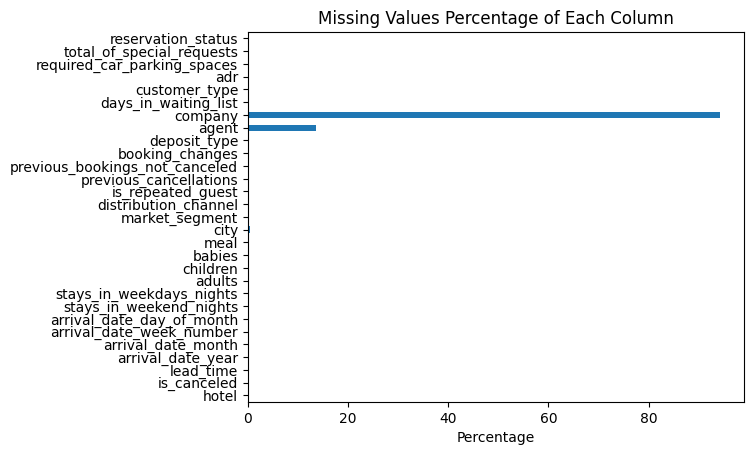

In [34]:
# Check missing values in percentage
missing_values = df.isna().sum() / df.shape[0] * 100

missing_values.plot(kind='barh')
plt.title('Missing Values Percentage of Each Column')
plt.xlabel('Percentage')

In [49]:
# Handle undefined values in the data
df[df.values == 'Undefined']

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
3106,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,NaN,65,Family,69.0,0,0,Check-Out
3107,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,NaN,65,Family,69.0,0,0,Check-Out
3108,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,NaN,65,Family,69.0,0,0,Check-Out
3110,Resort Hotel,0,62,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,NaN,0,Family,69.0,0,0,Check-Out
3111,Resort Hotel,0,105,2017,January,47,18,2,4,2,0.0,0,Undefined,Kota Batu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,313.0,NaN,65,Family,69.0,0,0,Check-Out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40600,City Hotel,1,2,2017,October,32,3,1,0,2,NaN,0,Breakfast,Kota Denpasar,Undefined,Undefined,0,0,0,0,No Deposit,NaN,NaN,0,Family,12.0,0,1,Canceled
40667,City Hotel,1,1,2017,October,32,5,0,2,2,NaN,0,Breakfast,Kota Denpasar,Direct,Undefined,0,0,0,0,No Deposit,14.0,NaN,0,Family,12.0,0,1,Canceled
40679,City Hotel,1,1,2017,October,32,5,0,2,3,NaN,0,Breakfast,Kota Denpasar,Undefined,Undefined,0,0,0,0,No Deposit,NaN,NaN,0,Family,18.0,0,2,Canceled
40679,City Hotel,1,1,2017,October,32,5,0,2,3,NaN,0,Breakfast,Kota Denpasar,Undefined,Undefined,0,0,0,0,No Deposit,NaN,NaN,0,Family,18.0,0,2,Canceled


In [ ]:
# Handle missing and duplicated values 
df.drop(columns='company', inplace=True) #handling company feature by droppping it
df.rename({'children' : 'num_children',
           'adults' : 'num_adults',
           'hotel' : 'hotel_type'})